In [23]:
cd "/content/drive/MyDrive/Data Projects/03 Bigram Language Model"

/content/drive/MyDrive/Data Projects/03 Bigram Language Model


In [3]:
#reading names.txt and storing it as a list of words
words = open("names.txt", 'r').read().splitlines()

## Exploring the dataset

In [4]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [5]:
#number of names
len(words)

32033

In [6]:
#length of longest name
max(len(name) for name in words)

15

In [7]:
#length of shortest name
min(len(name) for name in words)

2

## Creating a dictionary containing frequency of occurence of bigrams

In [8]:
b = {}
for word in words:
  #adding characters to word to denote start and end
  word = ['<S>'] + list(word) + ['<E>']
  for ch1, ch2 in zip(word, word[1:]):
    b[(ch1, ch2)] = b.get((ch1, ch2), 0) + 1

In [9]:
#sorting the bigrams based on frequency
b = dict(sorted(b.items(), key = lambda item: item[1], reverse = True))

In [10]:
list(b.items())[:10]

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963)]

#### Inference

*   'n' is the most common end character followed by 'a'
*   'a' is the most commong start character followed by 'k'



## Creating a tensor to store bigram frequencies

### Mapping letters to integers

In [11]:
#set of letters
l = set(''.join(words))

In [12]:
#adding "<S>" to denote starting character
letters = ["<S>"]
#appending sorted list of set of letters
letters.extend(sorted(list(l)))
#adding <E> to denote ending character
letters.append("<E>")
letters

['<S>',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '<E>']

In [13]:
#mapping letters to integers
stoi = {ch: i for i, ch in enumerate(letters)}
#creating map from integers to letters
itos = {i:ch for ch, i in stoi.items()}

In [14]:
#initializing the 28*28 tensor
import torch
N = torch.zeros((28,28), dtype=torch.int32)

#### Moving tensor N to GPU

In [15]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
N = N.to(device)
N.is_cuda

False

In [16]:
#adding frequencies to the tensor
for word in words:
  #adding characters to word to denote start and end
  word = ["<S>"] + list(word) + ["<E>"]
  for ch1, ch2 in zip(word, word[1:]):
    i1 = stoi[ch1]
    i2 = stoi[ch2]
    N[i1][i2] += 1

In [17]:
#number of times 'a' is the last letter
N[1][27].item()

6640

## Visualizing the tensor

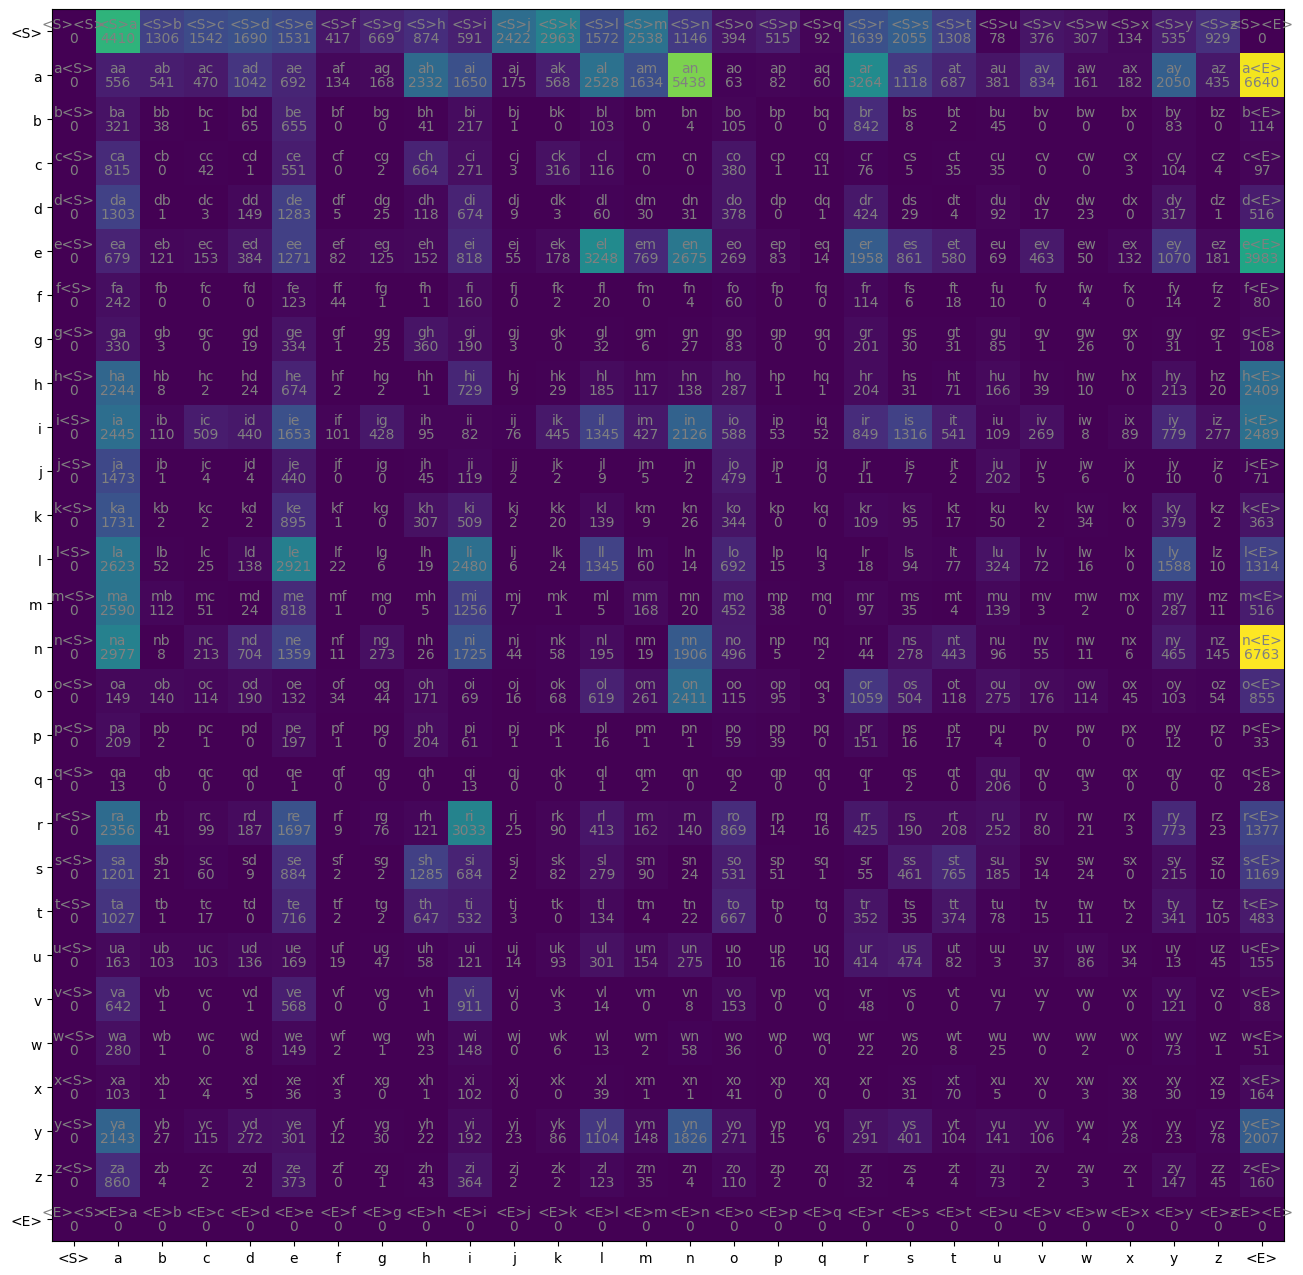

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
fig.set_size_inches(16,16)

im = ax.imshow(N.cpu())
ax.set_xticks(np.arange(len(letters)), labels=letters)
ax.set_yticks(np.arange(len(letters)), labels=letters)

for i in range(28):
    for j in range(28):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')

plt.show()

# Generating new names

In [19]:
#converting N to a probability distribution P
P = N.float()
P /= P.sum(dim=1, keepdim=True)

In [20]:
P[0].sum()

tensor(1.)

In [32]:
g = torch.Generator(device=device).manual_seed(2147483647)
generated_names = []
for i in range(100):
  #index of probability dist. of first letters
  ix = 0
  new_word = ""
  while True:
    #probability dist. of starting letters
    p = P[ix]
    #index of next letter
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=None).item() #multinomial throws out integers based on prob. dist.
    #if next letter is "<E>"
    if ix == 27:
      break
    new_word += itos[ix]
  generated_names.append(new_word)

In [34]:
with open('Generated Names.txt', 'w') as f:
  for name in generated_names:
    f.write(name + "\n")

In [33]:
generated_names[:10]

['mion', 'k', 'a', 'jevi', 'nneifari', 'koh', 'h', 'kela', 'juntuli', 'hajer']